In [2]:
import pandas as pd
df = pd.read_csv("adult_csv.csv") # we need to put csv file into same path before doing this code
df.head(5) # otherwise, we need to re-write out csv file path

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [3]:
# Remove features ‘capitalgain’, ‘capitalloss’ and ‘native-country.’
df.drop(['capitalgain','capitalloss','native-country'],axis=1,inplace=True)
df.head(5) # meaningless columns have been removed

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hoursperweek,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,2,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,2,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,2,<=50K


In [4]:
# We get columns name here
columns_list = df.columns.tolist()
columns_list

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'hoursperweek',
 'class']

In [5]:
# Check which column contains missing value
df[columns_list].isnull().sum() # The value in the following which is not 0, then it contains missing value

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
hoursperweek         0
class                0
dtype: int64

In [6]:
# Import the package we need
import numpy as np
import pandas as pd
import math

In [7]:
# Remove instances with at least one missing value ‘?’ or Nan
df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)
# This csv file is reasonable, the missing value is Nan or nan, instead of ?, so we do not need to replace it before delete it 
df[columns_list].isnull().sum() # Now, there is no missing value anymore

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hoursperweek      0
class             0
dtype: int64

In [8]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hoursperweek,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,2,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,2,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,2,<=50K


In [9]:
# Randomly split the dataset into 90% as train and 10% as test.
from sklearn.model_selection import train_test_split
# with random_state = None, everytime when we do this code, can get a different split.
df_train, df_test = train_test_split(df, test_size= 0.1, random_state= None)
# we split the dataset into trainset and testset, I think we do not need to respectively make class into a singe column

In [10]:
# Select the continuous attributes for training this time
continuous_list = ['age','fnlwgt','education-num','hoursperweek','class']
# 'class' is not continuous attributes, but we need that to calculate the frequence by class
df_train[continuous_list].head(5)

,age,fnlwgt,education-num,hoursperweek,class
5126,0,116791,9,2,<=50K
29271,1,217274,10,3,<=50K
24010,2,120277,14,2,>50K
638,3,248145,3,3,<=50K
2430,4,240521,9,2,>50K


In [11]:
# Create list for trainset for better index
data_list = np.array(df_train[continuous_list]).tolist()
data_list # it is used to train

[[0, 116791, 9, 2, '<=50K'],
 [1, 217274, 10, 3, '<=50K'],
 [2, 120277, 14, 2, '>50K'],
 [3, 248145, 3, 3, '<=50K'],
 [4, 240521, 9, 2, '>50K'],
 [2, 149640, 10, 2, '<=50K'],
 [0, 291429, 9, 1, '<=50K'],
 [2, 99385, 9, 2, '<=50K'],
 [0, 177896, 9, 2, '<=50K'],
 [2, 136137, 10, 2, '<=50K'],
 [3, 186534, 9, 3, '>50K'],
 [4, 148874, 5, 2, '<=50K'],
 [0, 500720, 9, 2, '<=50K'],
 [2, 136081, 9, 2, '<=50K'],
 [1, 91839, 13, 0, '>50K'],
 [2, 46406, 14, 2, '>50K'],
 [2, 397280, 12, 3, '>50K'],
 [4, 257555, 10, 2, '<=50K'],
 [1, 146980, 9, 4, '<=50K'],
 [4, 45741, 13, 1, '>50K'],
 [1, 295589, 14, 2, '>50K'],
 [4, 53707, 4, 3, '<=50K'],
 [4, 166715, 10, 0, '<=50K'],
 [1, 157747, 10, 2, '<=50K'],
 [0, 244602, 8, 0, '<=50K'],
 [3, 176409, 13, 2, '<=50K'],
 [0, 401335, 10, 1, '<=50K'],
 [2, 128586, 13, 2, '<=50K'],
 [1, 262617, 9, 3, '<=50K'],
 [0, 146343, 9, 2, '<=50K'],
 [2, 174373, 12, 2, '>50K'],
 [4, 52822, 13, 3, '<=50K'],
 [0, 168403, 13, 2, '<=50K'],
 [4, 26248, 4, 1, '>50K'],
 [3, 196894, 

In [12]:
# prob_c1 is for class '>50K', prob_c2 is for class '<=50K'
# all of the following variable name follow this rule
prob_c1 = 0
prob_c2 = 0
for i in data_list:
  if i[-1] == '>50K':
    prob_c1 += 1
  else:
    prob_c2 += 1
prob_c1 = prob_c1 /len(data_list)
prob_c2 = prob_c2 /len(data_list)
prior_prob = {'>50K':prob_c1,'<=50K':prob_c2}
prior_prob # we get prior probability here

{'>50K': 0.2487388061502812, '<=50K': 0.7512611938497188}

In [13]:
# the block is used to create the data list seperated by class
# c1 for one class, c2 for another class
# it is because we want to calculate the probability of each class
data_list_c1 = []
data_list_c2 = []
for vector in data_list:
  if vector[-1] == '>50K':
    data_list_c1.append(vector)
  else:
    data_list_c2.append(vector)
len(data_list_c1)

10305

In [14]:
# before we calculate the probability, we delete the last column which is class
# because class does not need to calculate probability in this case
data_list_c1 = np.delete(data_list_c1,-1,axis = 1)
data_list_c2 = np.delete(data_list_c2,-1,axis = 1)

In [15]:
data_list_c2[:10]

array([['0', '116791', '9', '2'],
       ['1', '217274', '10', '3'],
       ['3', '248145', '3', '3'],
       ['2', '149640', '10', '2'],
       ['0', '291429', '9', '1'],
       ['2', '99385', '9', '2'],
       ['0', '177896', '9', '2'],
       ['2', '136137', '10', '2'],
       ['4', '148874', '5', '2'],
       ['0', '500720', '9', '2']], dtype='<U21')

In [16]:
# Estimate the probabilities for continuous attributes (‘age’, ‘fnlwgt’, ‘education-num’
# and ‘hoursperweek’) by fitting a Normal distribution.

# Get the mean
def mean(attribute):
    arr = []
    for x in attribute:
      arr.append(float(x)) 
    ans = sum(arr)/float(len(arr))
    return ans
# Get the variance: (x-average)^2 / the number of x
def var(attribute):
    arr = []
    for x in attribute:
      arr.append(float(x))
    average = mean(arr)
    a = []
    for x in arr:
      a.append(math.pow(x-average,2))
    a = sum(a)
    variance = a / float(len(arr)-1)
    return variance

In [17]:
# we make a turple for each class
# summariedTurple1[0] stands for age, [1] stands for fnlwgt and so on
summariedTurple1 = [(mean(x),var(x)) for x in zip(*data_list_c1)]
summariedTurple2 = [(mean(x),var(x)) for x in zip(*data_list_c2)]

In [ ]:
summariedTurple1

[(2.327867252318204, 1.0003605915134304),
 (188046.72201073694, 10529345011.353401),
 (11.616398243045388, 5.6511562958971995),
 (2.3468033186920447, 0.5475212620741011)]

In [18]:
# this block is used to calculate the condition probability for continuous attributes
# we use the formula from slides to do that
def calculateProbability(x,mean,var): 
    first = math.pow((x-mean),2)/(-2*var)
    exp = math.exp(first)
    second = (1/math.sqrt(2*math.pi*var))
    probability = second * exp
    return probability

In [19]:
# this function is used to get one vector probability
# with the array we can muliply it in latter
def getProbabilityArr(vector,summariedTurple):
  arr = []
  for i in range(4):
      mean = summariedTurple[i][0]
      var = summariedTurple[i][1]
      x = vector[i]
      x = float(x)
      arr.append(calculateProbability(x,mean,var))
  return arr

In [ ]:
# predict one sample class
# one single sample: [12,32443,12,23]
# choose the maximum probability to be their class
def oneSamplepredict(vector):
  arr1 = getProbabilityArr(vector,summariedTurple1)
  arr2 = getProbabilityArr(vector,summariedTurple2)
  prob1 = 1
  for i in arr1:
    prob1 *= i
  prob1 *= prob_c1
  
  prob2 = 1
  for i in arr2:
    prob2 *= i
  prob2 *= prob_c2
  if prob1 > prob2:
    return '>50K'
  else:
    return '<=50K'

In [ ]:
oneSamplepredict(data_list_c1[1]) # predict correct, all of list_c1 belongs to >50K

'>50K'

In [ ]:
# get the predict Accuracy from this function
def predictWholeAcc(data_list):
  count = 0
  for vector in data_list:
    a = oneSamplepredict(vector)
    if a == vector[-1]:
      count +=1
  return count / len(data_list) *100.0 # mulitipy a float to get a float return value

In [ ]:
# a simple test
testset = np.array( df_test[continuous_list] ).tolist()
testset[:10]

[[2, 293176, 13, 2, '>50K'],
 [2, 176296, 12, 3, '<=50K'],
 [0, 135645, 14, 0, '<=50K'],
 [1, 29261, 12, 2, '<=50K'],
 [3, 102828, 9, 2, '>50K'],
 [0, 136309, 7, 2, '<=50K'],
 [4, 48034, 9, 0, '<=50K'],
 [1, 420351, 9, 2, '<=50K'],
 [0, 186925, 10, 3, '<=50K'],
 [3, 114222, 11, 2, '<=50K']]

In [ ]:
# display the accuracy
# remember that this is the accuracy only using continuous attributes, not final accuracy
print('Accuracy:%f%%'%predictWholeAcc(testset))

Accuracy:77.628149%


In [ ]:
# From now, calculate the probabilities of discrete attributes (remaining attributes) using Laplace smoothing.

In [ ]:
# The result list of continuous attributes, which is for comparing the discrte attributes latter.
# ***** this code costs long time as well
def getPredictList(testset):
  continuous_result_list = []
  for vector in testset:
        feacutres = vector[:-1] 
        ansClass = vector[len(vector)-1] 
        predictClass = oneSamplepredict(feacutres)
        continuous_result_list.append(predictClass)
continuous_result_list = getPredictList(testset)

In [ ]:
continuous_list = ['age','fnlwgt','education-num','hoursperweek']
# The following try to classfy by using discrete attributes
# Create a remaining list for discrete attributes
discrete_list = [x for x in columns_list if x not in continuous_list] 

In [24]:
# create a list for discrete attributes
real_list = ['workclass','education','marital-status','occupation','relationship','race','sex','class']
data_list = np.array(df_train[real_list])
data_list[:5] # display the list

array([['Private', 'HS-grad', 'Never-married', 'Machine-op-inspct',
        'Other-relative', 'White', 'Female', '<=50K'],
       ['Private', 'Some-college', 'Married-civ-spouse',
        'Machine-op-inspct', 'Husband', 'White', 'Male', '<=50K'],
       ['Self-emp-inc', 'Masters', 'Married-civ-spouse',
        'Exec-managerial', 'Husband', 'White', 'Male', '>50K'],
       ['Self-emp-inc', '5th-6th', 'Married-civ-spouse',
        'Transport-moving', 'Husband', 'White', 'Male', '<=50K'],
       ['Private', 'HS-grad', 'Married-civ-spouse', 'Craft-repair',
        'Husband', 'White', 'Male', '>50K']], dtype=object)

In [25]:
# this block is used to calculate the prior probability
# like P(c1) P(c2)
prob_c1 = 0 # prior probability of class '>50K'
prob_c2 = 0 # prior probability of class '<=50K'
for i in data_list:
  if i[-1] == '>50K':
    prob_c1 += 1
  else:
    prob_c2 += 1
# right here, I did not use Laplace smoothing
# it is because there must be some value in each class
prob_c1 = prob_c1 /len(data_list)
prob_c2 = prob_c2 /len(data_list)
prior_prob = {'>50K':prob_c1,'<=50K':prob_c2}
prior_prob

{'>50K': 0.2487388061502812, '<=50K': 0.7512611938497188}

In [26]:
# this block is used to the data list by class
# same as above, c1 belongs to >50K, c2 belongs to <=50K
data_list_c1 = []
data_list_c2 = []
for vector in data_list:
  if vector[-1] == '>50K':
    data_list_c1.append(vector)
  else:
    data_list_c2.append(vector)
len(data_list_c1)

10305

In [27]:
# this block is used to get the frequence of each value
def getDictByClass(data_list):
  dictofone_c1 = {}
  for vector in data_list:
    for i in range(len(vector)-1):
      if vector[i] in dictofone_c1:
        dictofone_c1[vector[i]] += 1
      else:
        dictofone_c1[vector[i]] = 1
  return dictofone_c1

In [28]:
# using laplace smoothing to calculate the probability of each value
def getDictProb(dictCount):
  for i,j in dictCount.items():
    dictCount[i] = (j+1) / (len(data_list_c1) +1) # Laplace smoothing
  return dictCount

In [29]:
# a little sample of dictProb
dictofone_c1 = getDictByClass(data_list_c2)
getDictProb(dictofone_c1)

{'Private': 2.3125363865709296,
 'HS-grad': 1.0930525907238502,
 'Never-married': 1.2314185911119737,
 'Machine-op-inspct': 0.23054531340966428,
 'Other-relative': 0.11711624296526295,
 'White': 2.5363865709295554,
 'Female': 1.151853289346012,
 'Some-college': 0.7016301183776441,
 'Married-civ-spouse': 1.0257131767902192,
 'Husband': 0.9056860081505919,
 'Male': 1.868329128662915,
 'Self-emp-inc': 0.06627207451969726,
 '5th-6th': 0.03842421890161071,
 'Transport-moving': 0.16446730060159132,
 'Craft-repair': 0.4121870754900058,
 'Other-service': 0.41170192121094507,
 'Own-child': 0.5731612652823598,
 'Divorced': 0.49660392004657483,
 'Adm-clerical': 0.42450999417814866,
 'Not-in-family': 0.9285852901222589,
 'Handlers-cleaners': 0.16912478168057443,
 'Black': 0.33281583543566856,
 'State-gov': 0.12701339025810207,
 'Separated': 0.11672811954201436,
 '9th': 0.05686008150591888,
 'Sales': 0.35066951290510384,
 'Married-spouse-absent': 0.04599262565495828,
 'Unmarried': 0.398408693964680

In [30]:
# make our test_list for testing our model
test_list = np.array(df_test[real_list])

In [ ]:
# this function is used to predict one sample
# calculate two probability
# the bigger one, meaning that the sample should belong to that class
def predictOne(vector):
  dictofone_c1 = getDictByClass(data_list_c1)
  dictofone_c2 = getDictByClass(data_list_c2)
  dictProb1 = getDictProb(dictofone_c1)
  dictProb2 = getDictProb(dictofone_c2)

  con_prob_c1 = 1
  for i in range(len(vector)-1):
    con_prob_c1 *= dictofone_c1[vector[i]]
  con_prob_c1 *= prior_prob['>50K']

  con_prob_c2 = 1
  for i in range(len(vector)-1):
    con_prob_c2 *= dictofone_c2[vector[i]]
  con_prob_c2 *= prior_prob['<=50K']
  if con_prob_c1 > con_prob_c2:
    return '>50K'
  else:
    return '<=50K'

In [31]:
# we modify the predictOneSample function above to get the probability of continuous attributes
# record that probability and then mutiply the probability with disrecte attributes prob
def getContinuousPro(vector):
  arr1 = getProbabilityArr(vector,summariedTurple1)
  arr2 = getProbabilityArr(vector,summariedTurple2)
  prob1 = 1
  for i in arr1:
    prob1 *= i
  #prob1 *= prob_c1
  
  prob2 = 1
  for i in arr2:
    prob2 *= i
  #prob2 *= prob_c2
  # if prob1 > prob2:
  #   return '>50K'
  # else:
  #   return '<=50K'
  return prob1,prob2

In [32]:
# use prob1 get from contious attributes and mulitip it
# get the final probability
# the bigger final probability, the more likely to belong this class
def predictOneFinal(vector,continuous_vector):
  dictofone_c1 = getDictByClass(data_list_c1) # the count number by class: 'private':412times, '12':213times
  dictofone_c2 = getDictByClass(data_list_c2)
  dictProb1 = getDictProb(dictofone_c1)  # get the frequence probability of class
  dictProb2 = getDictProb(dictofone_c2)
  prob1 = getContinuousPro(continuous_vector)[0]  # continuous prob from class1
  prob2 = getContinuousPro(continuous_vector)[1]  # continuous prob from class2

  con_prob_c1 = 1
  for i in range(len(vector)-1):
    con_prob_c1 *= dictofone_c1[vector[i]]
  con_prob_c1 *= prior_prob['>50K']

  con_prob_c2 = 1
  for i in range(len(vector)-1):
    con_prob_c2 *= dictofone_c2[vector[i]]
  con_prob_c2 *= prior_prob['<=50K']

  con_prob_c1 *= prob1
  con_prob_c2 *= prob2

  if con_prob_c1 > con_prob_c2:
    return '>50K'
  else:
    return '<=50K'

In [52]:
# a simple test
test_list_discrete = np.array(df_test[real_list])
test_list_continuous = np.array(df_test[continuous_list])
predictOneFinal(test_list_discrete[1],test_list_continuous[1])

'<=50K'

In [77]:
# get accuracy of the model
# this function takes a lot of time
def getAccFinal(test_list_discrete,test_list_continuous):
  count = 0
  acc = []
  i = 0
  for vector,continuous_vector in zip(test_list_discrete, test_list_continuous):
    i += 1
    a = predictOneFinal(vector,continuous_vector)
    if a == vector[-1]:
      count +=1
    acc.append(count / i * 100.0)
  return count / len(test_list_discrete) *100.0,acc

In [84]:
acc = getAccFinal(test_list_discrete,test_list_continuous)[1]

In [81]:
import matplotlib.pyplot as plt

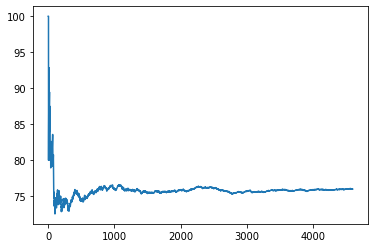

In [85]:
plt.plot(acc)

In [86]:
print('Accuracy:%f%%'%acc[-1])

Accuracy:75.999131%


In [ ]:
# Reference:
# 1. https://blog.csdn.net/u013597931/article/details/81705718
# 2. https://blog.csdn.net/yinyu19950811/article/details/78060267
# 3. https://www.programminghunter.com/article/7451183638/
# 4. https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python
# 5. https://datahub.io/machine-learning/adult#resource-adult_zip
# 6. http://icejoywoo.github.io/2019/03/16/python-unhashable-type-error.html